In [1]:
import datetime as dt
import pickle

import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from qubic.lib.Qgps import GPSAntenna

%matplotlib inline 

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


# Import data

In [2]:
### Build GPS data file path
data_path = "calsource_orientation.dat"

### Define the distance between the two antennas
distance_between_antennas = 1.3 # Just to initialize GPSAntenna

gps_antenna = GPSAntenna(data_path, distance_between_antennas)

names = np.array(['North', 'East', 'Down', 'Roll', 'Yaw'])
print(gps_antenna._datetime[8100])

del data_path, distance_between_antennas 

ERROR: Incorrect data at byte 60869700
ERROR: Incorrect data at byte 60869701
ERROR: Incorrect data at byte 60869702
ERROR: Incorrect data at byte 60869703
ERROR: Incorrect data at byte 60869704
ERROR: Incorrect data at byte 60869705
ERROR: Incorrect data at byte 60869706
ERROR: Incorrect data at byte 60869707
ERROR: Incorrect data at byte 60869708
ERROR: Incorrect data at byte 60869709
ERROR: Incorrect data at byte 60869710
ERROR: Incorrect data at byte 60869711
ERROR: Incorrect data at byte 60869712
ERROR: Incorrect data at byte 60869713
ERROR: Incorrect data at byte 60869714
ERROR: Incorrect data at byte 60869715
ERROR: Incorrect data at byte 60869716
ERROR: Incorrect data at byte 60869717
ERROR: Incorrect data at byte 60869718
ERROR: Incorrect data at byte 60869719
ERROR: Incorrect data at byte 60869720
ERROR: Incorrect data at byte 60869721
ERROR: Incorrect data at byte 60869722
ERROR: Incorrect data at byte 60869723
ERROR: Incorrect data at byte 60869724
ERROR: Incorrect data at 

In [3]:
index_ini = gps_antenna.get_observation_indices(gps_antenna._datetime, np.array([dt.datetime(year=2025, month=3, day=21, hour=14, minute=20, second=26)]))[0]
print('Initial index = ', index_ini)
print('size observation times : ', len(gps_antenna._datetime))
index_stop = -1
print('Date when observation stoped : ', gps_antenna._datetime[index_stop])

Initial index =  1352906
size observation times :  1469906
Date when observation stoped :  2025-03-21 18:34:08.500000


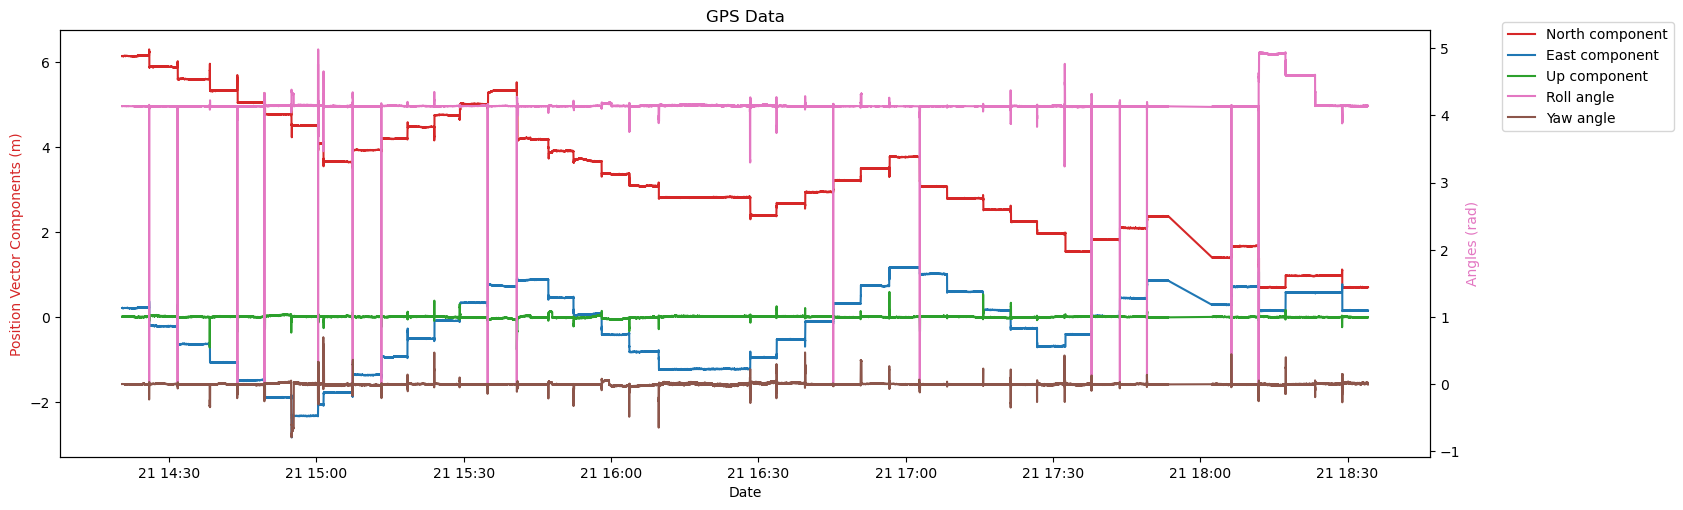

In [ ]:
gps_antenna.plot_gps_data(index_ini, index_stop)
gps_antenna.plot_gps_data_plotly(index_ini, index_stop)

# Build observation time indices

In [ ]:
# Array containing the starting time of each configuration


array_hours_begins = np.array([14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18])
array_minutes_begins = np.array([20, 26, 31, 38, 44, 49, 55, 1, 7, 13, 18, 24, 29, 35, 41, 48, 52, 0, 3, 10, 28, 33, 39, 45, 51, 56, 3, 8, 15, 21, 26, 32, 38, 44, 49, 2, 6, 12, 17, 23, 29])
array_seconds_begins = np.array([33, 10, 50, 25, 0, 32, 25, 35, 30, 20, 45, 5, 23, 3, 5, 3, 55, 6, 55, 0, 30 ,50, 40, 30, 0, 50, 10, 40, 55, 30, 55, 40, 5, 0, 20, 25, 30, 5, 35, 40, 5])

if array_hours_begins.size != array_minutes_begins.size or array_hours_begins.size != array_seconds_begins.size:
    print(array_hours_begins.size, array_minutes_begins.size, array_seconds_begins.size)
    raise ValueError("The arrays must have the same size")

# Array containing the seconds of each configuration
array_seconds_ending = np.zeros(array_hours_begins.shape, dtype=int)

# Build the array of datetime associated with each configuration, to delimit the time when the antenna are moving or not
#! Each configuration last at least 5 minutes
array_datetime_begin = np.array([])
array_datetime_end = np.array([])
for index in range(array_hours_begins.shape[0]):
    array_datetime_begin = np.append(array_datetime_begin, dt.datetime(year=2025, month=3, day=21, hour=array_hours_begins[index], minute=array_minutes_begins[index], second=array_seconds_begins[index]))
    if array_minutes_begins[index] > 54:
        # Test to avoid minutes > 60
        print(array_minutes_begins[index])
        array_datetime_end = np.append(array_datetime_end, dt.datetime(year=2025, month=3, day=21, hour=array_hours_begins[index] + 1, minute=array_minutes_begins[index] + 5 - 60, second=array_seconds_ending[index]))
    else:
        array_datetime_end = np.append(array_datetime_end, dt.datetime(year=2025, month=3, day=21, hour=array_hours_begins[index], minute=array_minutes_begins[index] + 5, second=array_seconds_ending[index]))
array_datetime_end[15] = dt.datetime(year=2025, month=3, day=21, hour=15, minute=52, second=13)
array_datetime_end[17] = dt.datetime(year=2025, month=3, day=21, hour=16, minute=3, second=39)
array_datetime_end[18] = dt.datetime(year=2025, month=3, day=21, hour=16, minute=9, second=39)
array_datetime_end[34] = dt.datetime(year=2025, month=3, day=21, hour=17, minute=53, second=29)
array_datetime_end[35] = dt.datetime(year=2025, month=3, day=21, hour=18, minute=6, second=18)
array_datetime_end[36] = dt.datetime(year=2025, month=3, day=21, hour=18, minute=11, second=45)

index_array_begin = np.array([], dtype=int)
index_array_end = np.array([], dtype=int)
for index in range(array_datetime_begin.size):
    index_array_begin = np.append(index_array_begin, gps_antenna.get_observation_indices(gps_antenna._datetime, np.array([array_datetime_begin[index]])))
    index_array_end = np.append(index_array_end, gps_antenna.get_observation_indices(gps_antenna._datetime, np.array([array_datetime_end[index]])))
        
del array_hours_begins, array_minutes_begins, array_seconds_begins, array_seconds_ending, array_datetime_begin, array_datetime_end, index

## Test

In [ ]:
# if DEBUG:
#     fig = go.Figure()
#     for index in range(int(index_array_begin.size)):
        
#         fig.add_trace(go.Scatter(x=gps_antenna._datetime[index_ini:], y=gps_antenna.roll[index_ini:]))
#         fig.add_vline(x=gps_antenna._datetime[index_array_begin[index]], line_dash="dash", line_color="red")
#         fig.add_vline(x=gps_antenna._datetime[index_array_end[index]], line_dash="dash", line_color="blue")
#         fig.update_layout(
#             title='GPS Roll Angle',
#             xaxis_title='Date',
#             yaxis_title='Angle (rad)',
#             yaxis_range=[0, 2*np.pi]
#         )
    
#     fig.show()
#     del index

In [ ]:
# Plot to verify the previous delimitation
fig, ax1 = plt.subplots(figsize = (15,5))

color_a = 'tab:pink'
color_r = 'tab:red'
color_b = 'tab:blue'
color_d = 'tab:green'
color_c = 'tab:brown'

ax1.set_xlabel('Date')
ax1.set_ylabel('Position Vector Components (m)', color = color_r)
ax1.plot(gps_antenna._datetime[index_ini:], gps_antenna.rpN[index_ini:], color = color_r, label = 'North component')
ax1.plot(gps_antenna._datetime[index_ini:], gps_antenna.rpE[index_ini:], color = color_b, label = 'East component')
ax1.plot(gps_antenna._datetime[index_ini:], gps_antenna.rpD[index_ini:], color = color_d, label = 'Up component')

ax2 = ax1.twinx()

ax2.plot(gps_antenna._datetime[index_ini:], gps_antenna.roll[index_ini:], color = color_a, label = 'Roll angle')
ax2.plot(gps_antenna._datetime[index_ini:], gps_antenna.yaw[index_ini:], color = color_c, label = 'Yaw angle')
ax2.set_xlabel('Date')
ax2.set_ylabel('Angles (rad)', color = color_a)

ax2.vlines(gps_antenna._datetime[index_array_begin], -1, 5, 'r', linestyles='--')
ax2.vlines(gps_antenna._datetime[index_array_end], -1, 5, 'b', linestyles='--')

fig.tight_layout()
ax1.set_title("Position vector components")
fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

del fig, ax1, ax2, color_a, color_r, color_b, color_d, color_c,

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gps_antenna._datetime[index_ini:index_stop], y=gps_antenna.rpN[index_ini:],
               name="North component", line=dict(color='red')),secondary_y=False)

fig.add_trace(
    go.Scatter(x=gps_antenna._datetime[index_ini:index_stop], y=gps_antenna.rpE[index_ini:],
               name="East component", line=dict(color='blue')),secondary_y=False)

fig.add_trace(
    go.Scatter(x=gps_antenna._datetime[index_ini:index_stop], y=gps_antenna.rpD[index_ini:],
               name="Up component", line=dict(color='green')), secondary_y=False)

# Add angles on secondary y-axis
fig.add_trace(
    go.Scatter(x=gps_antenna._datetime[index_ini:index_stop], y=gps_antenna.roll[index_ini:],
               name="Roll angle", line=dict(color='pink')),secondary_y=True,)

fig.add_trace(
    go.Scatter(x=gps_antenna._datetime[index_ini:index_stop], y=gps_antenna.yaw[index_ini:],
               name="Yaw angle", line=dict(color='brown')),secondary_y=True,)

# Add vertical lines
for i in range(len(index_array_begin)):
    fig.add_vline(
        x=gps_antenna._datetime[index_array_begin[i]],
        line_width=1,
        line_dash="dash",
        line_color="red",
        layer='above')
    
    fig.add_vline(
        x=gps_antenna._datetime[index_array_end[i]],
        line_width=1,
        line_dash="dash",
        line_color="blue",
        layer='above')

# Update layout
fig.update_layout(
    title="Position vector components",
    xaxis_title="Date",
    legend=dict(x=1.1, y=1),
    width=1600,
    height=800,)

fig.update_yaxes(title_text="Position Vector Components (m)", secondary_y=False, color="red")
fig.update_yaxes(title_text="Angles (rad)", secondary_y=True, color="pink")

fig.show()

In [ ]:
# Function to remove the movement between each configurations
def only_data(array, indices_begin, indices_end):
    data_array = np.array([])
    
    if indices_begin.size != indices_end.size:
        raise ValueError("The number of begin and end indices must be the same.")
    
    for i in range(int(indices_begin.size)):
        data_array = np.append(data_array, array[indices_begin[i]:indices_end[i]])
    
    return data_array

In [ ]:
data_rpN = only_data(gps_antenna.rpN, index_array_begin, index_array_end)
data_rpE = only_data(gps_antenna.rpE, index_array_begin, index_array_end)
data_rpD = only_data(gps_antenna.rpD, index_array_begin, index_array_end)
data_roll = only_data(gps_antenna.roll, index_array_begin, index_array_end)
data_yaw = only_data(gps_antenna.yaw, index_array_begin, index_array_end)
data_datetime = only_data(gps_antenna._datetime, index_array_begin, index_array_end)

In [ ]:
# Plot to verify the filtering of the time when the antennas are moving
fig, ax1 = plt.subplots(figsize = (15,5))

color_a = 'tab:pink'
color_r = 'tab:red'
color_b = 'tab:blue'
color_d = 'tab:green'
color_c = 'tab:brown'

ax1.set_xlabel('Date')
ax1.set_ylabel('Position Vector Components (m)', color = color_r)
ax1.plot(data_rpN, color = color_r, label = 'North component')
ax1.plot(data_rpE, color = color_b, label = 'East component')
ax1.plot(data_rpD, color = color_d, label = 'Up component')

ax2 = ax1.twinx()

ax2.plot(data_roll, color = color_a, label = 'Roll angle')
ax2.plot(data_yaw, color = color_c, label = 'Yaw angle')
ax2.set_xlabel('Date')
ax2.set_ylabel('Angles (rad)', color = color_a)

fig.tight_layout()
ax1.set_title("Position vector components")
fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

del fig, ax1, ax2, color_a, color_r, color_b, color_d, color_c

# Noise power spectrum

In [ ]:
timestep = (gps_antenna._datetime[-1] - gps_antenna._datetime[-2]).microseconds * 1e-6
print("Timestep : ", timestep, "s.")

def get_ps(array):
    """Function to compute the power spectrum of a given array.

    Parameters
    ----------
    array : array_like
        array containing the data to compute the power spectrum of.

    Returns
    -------
    power_spectrum : array_like
        array containing the power spectrum of the input array.
    freq: array_like
        array containing the frequency of the power spectrum.
    """
    N = array.size
    return np.abs(np.fft.rfft(array))**2, np.fft.rfftfreq(N, d=timestep/2)

In [ ]:
power_spectrum, freq = get_ps(gps_antenna.rpN[index_array_begin[0]:index_array_end[0]])
power_spectrum, freq = power_spectrum[1:], freq[1:]

plt.plot(freq, power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power Spectrum ($m^2/Hz$)')
plt.xscale('log')
plt.yscale('log')
plt.title('Noise Power Spectrum - North')

del power_spectrum, freq

# Save in Pickle file

In [ ]:
data_array = np.array([gps_antenna.rpN, gps_antenna.rpE, gps_antenna.rpD, gps_antenna.roll, gps_antenna.yaw])
data_names = np.array(["rpN", "rpE", "rpD", "roll", "yaw"])

dict_data = {}

for idata in range(len(data_names)):
    dict_data[data_names[idata]] = {}
    dict_data[data_names[idata]]["data"] = []
    dict_data[data_names[idata]]["clean_data"] = []
    dict_data[data_names[idata]]["ps"] = []
    dict_data[data_names[idata]]["freq"] = []
    
dict_data["datetime"] = gps_antenna._datetime
dict_data["datetime_clean"] = data_datetime

In [ ]:
for idata in range(5):
    dict_data[data_names[idata]]["data"] = data_array[idata]
    for index in range(index_array_begin.size):
        print(index)
        dict_data[data_names[idata]]['clean_data'].append(data_array[idata][index_array_begin[index]:index_array_end[index]])
        ps, freq = get_ps(dict_data[data_names[idata]]['clean_data'][-1])
        ps, freq = ps[1:], freq[1:]
        dict_data[data_names[idata]]['ps'].append(ps)
        dict_data[data_names[idata]]['freq'].append(freq)

In [ ]:
with open('GPS_noise_analysis.pkl', 'wb') as f:
    data = pickle.dump(dict_data, f, protocol=pickle.HIGHEST_PROTOCOL)